In [66]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 

In [67]:
company = pd.read_csv("Company_Data.csv")

In [68]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [69]:
##Looking into unique value 
company["Sales"].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [70]:
##Preforming how many times each number is repeated
company["Sales"].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [71]:
##Looking into median to check the median-- middle value, which can help us in Stratified sampling
np.median(company["Sales"])

7.49

In [72]:
company["sales"]="<=7.49"
company.loc[company["Sales"]>=7.49,"sales"]=">=7.49"

In [73]:
company.drop(["Sales"],axis=1,inplace=True)

In [74]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [75]:
#get all categorical columns
cat_columns = company.select_dtypes(['object']).columns

#convert all categorical columns to numeric
company[cat_columns] = company[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [76]:
company.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales'],
      dtype='object')

In [77]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,0,0,0
1,111,48,16,260,83,1,65,10,0,0,0
2,113,35,10,269,80,2,59,12,0,0,0
3,117,100,4,466,97,2,55,14,0,0,1
4,141,64,3,340,128,0,38,13,0,1,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is depr

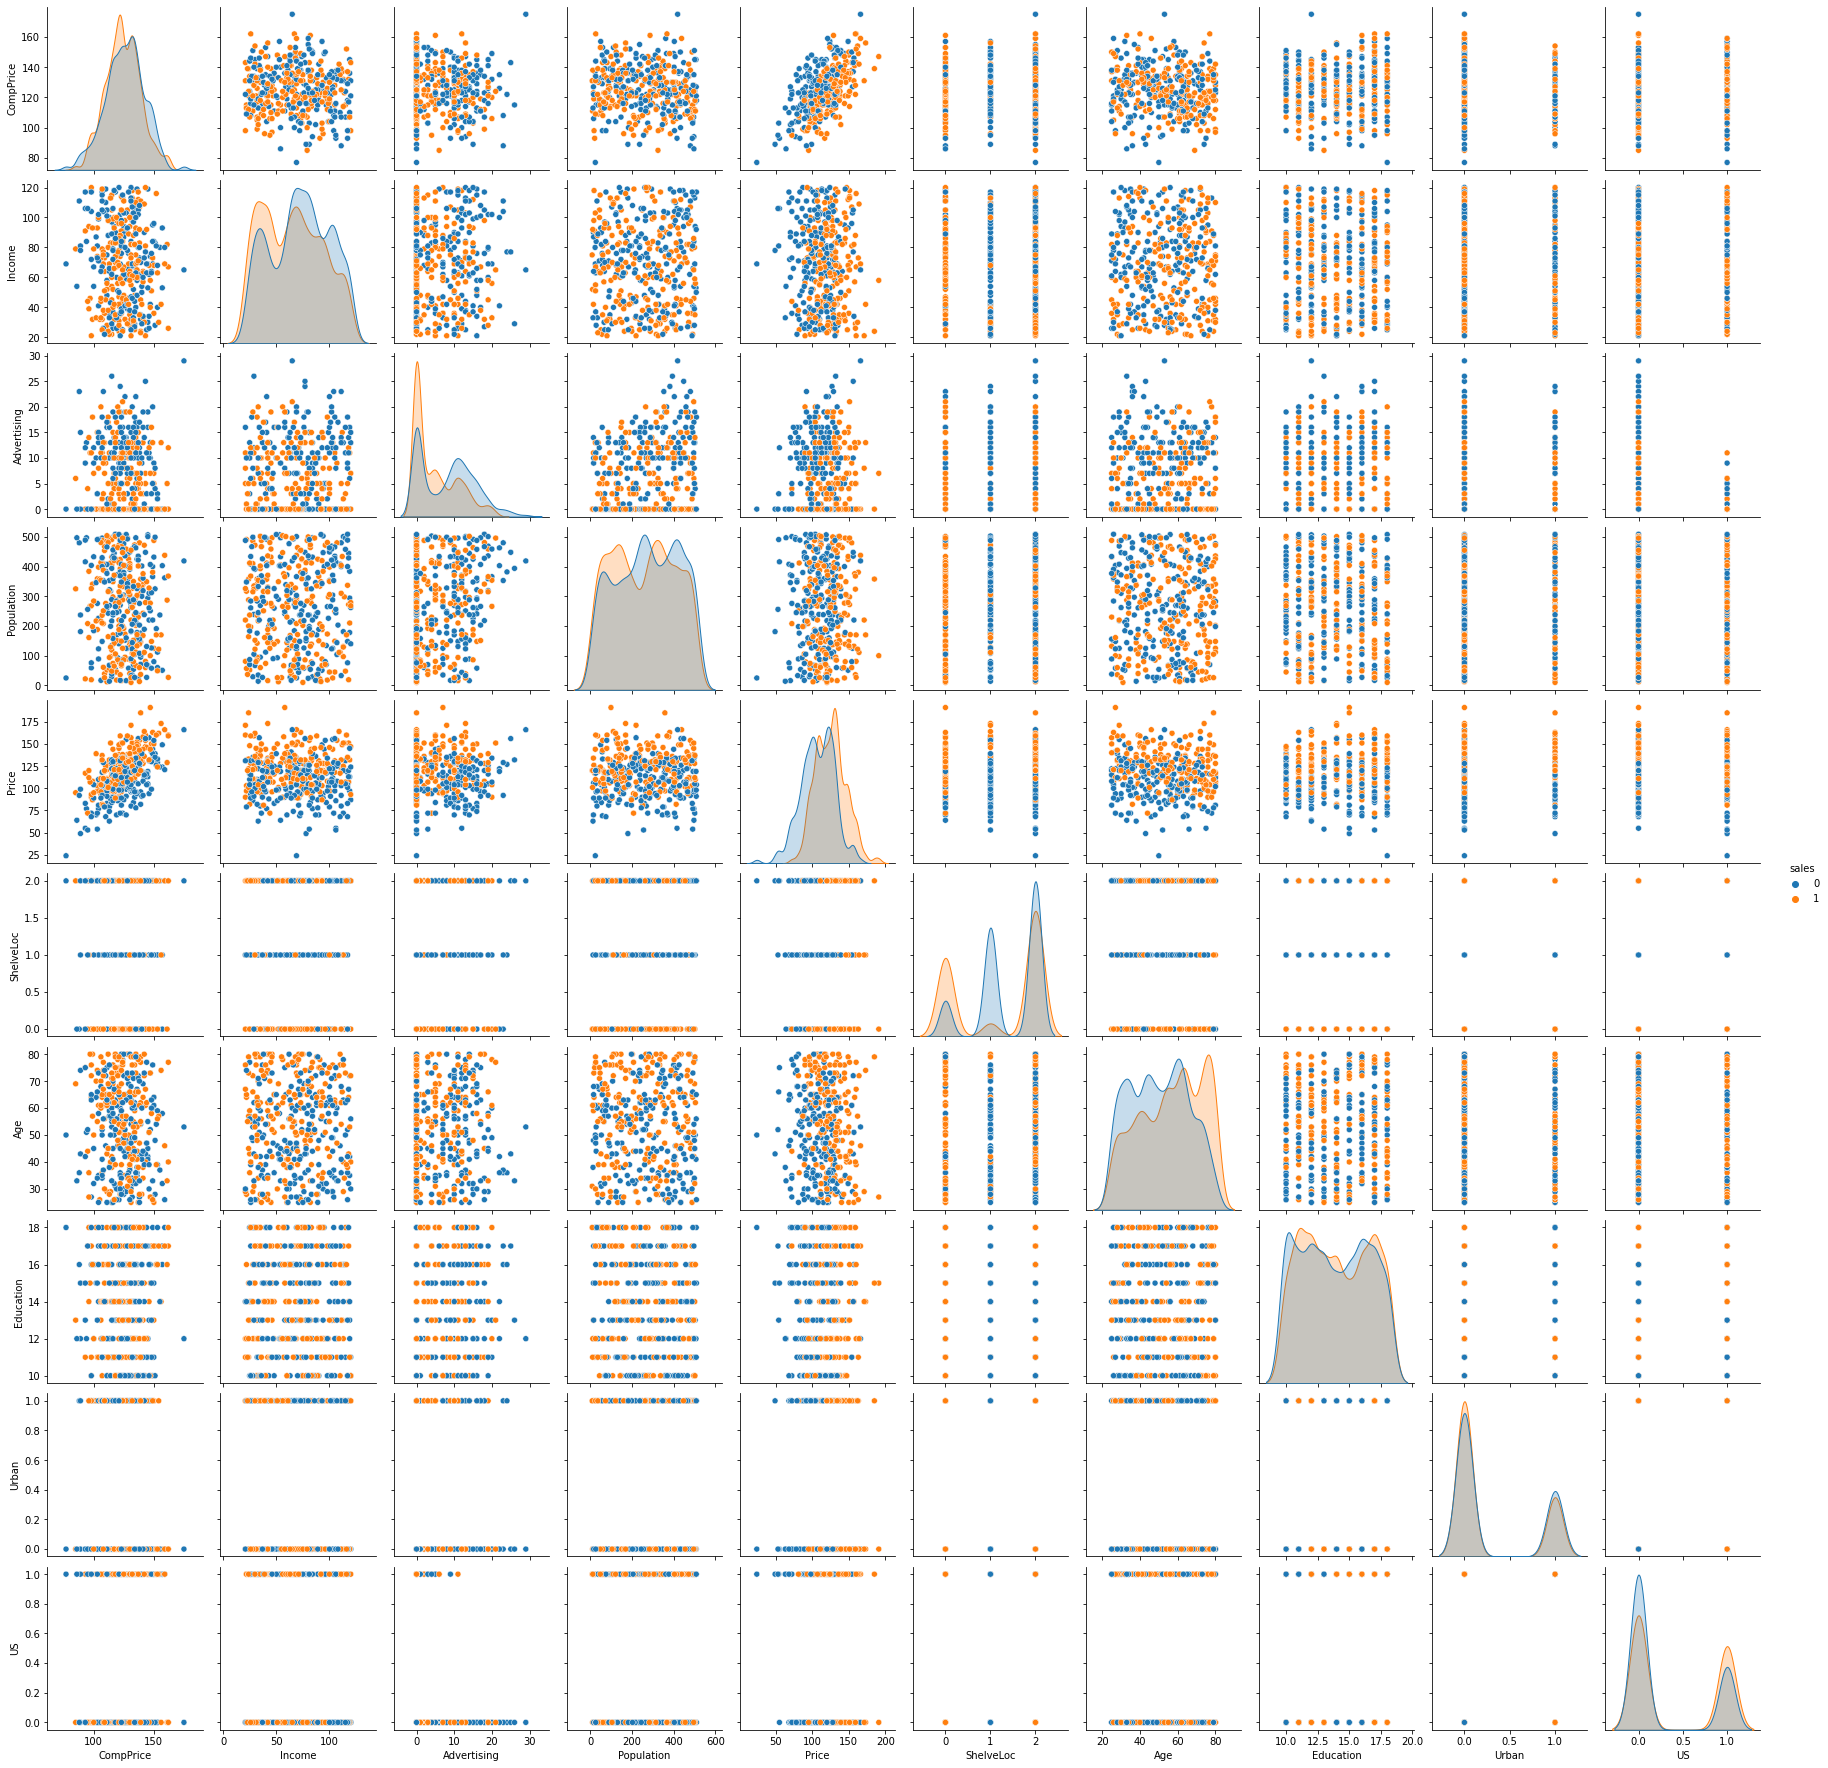

In [78]:
# Limiting the data
company2 =company[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'sales']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(company2, hue = 'sales', diag_kws={'bw': 0.2})

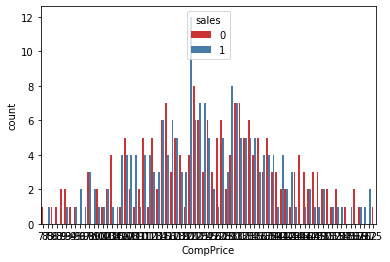

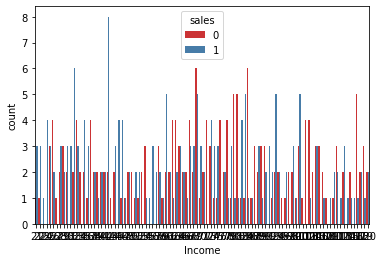

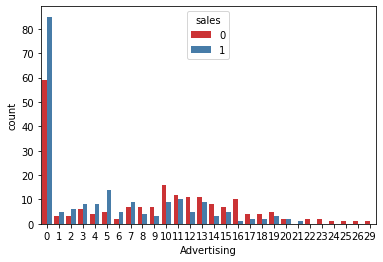

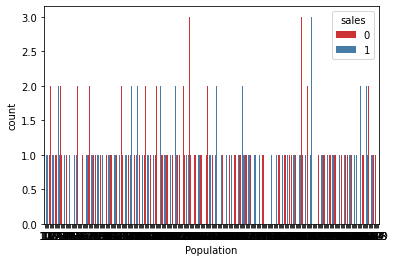

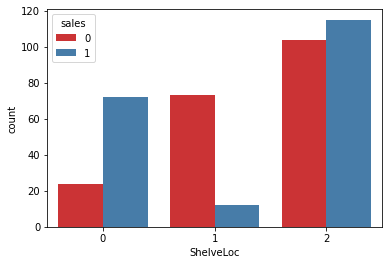

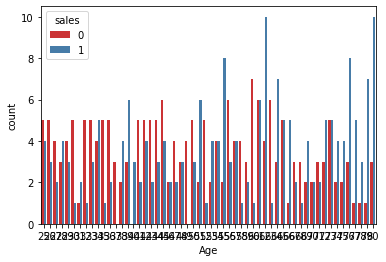

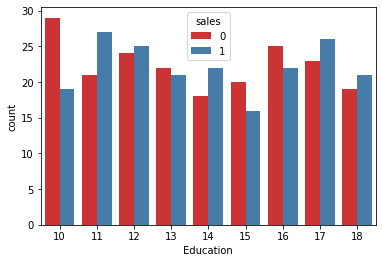

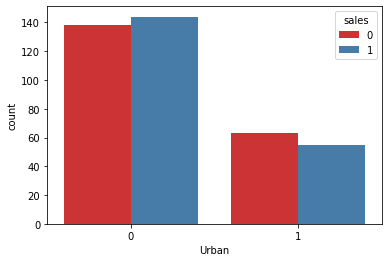

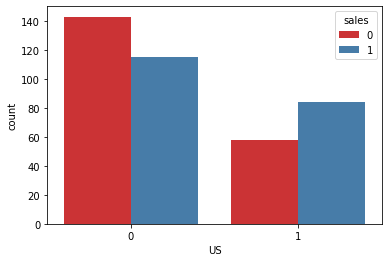

In [79]:
# Investigate all the features by our y

features = ['CompPrice', 'Income', 'Advertising', 'Population', 'ShelveLoc', 'Age',
       'Education','Urban','US']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=company,hue='sales', palette="Set1")

In [80]:
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,0,0,0
1,111,48,16,260,83,1,65,10,0,0,0
2,113,35,10,269,80,2,59,12,0,0,0
3,117,100,4,466,97,2,55,14,0,0,1
4,141,64,3,340,128,0,38,13,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,0,0,0
396,139,23,3,37,120,2,55,11,1,0,1
397,162,26,12,368,159,2,40,18,0,0,1
398,100,79,7,284,95,0,50,12,0,0,1


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
# Scaling our columns

scale_vars = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
         'Age', 'Education']
scaler = MinMaxScaler()
company[scale_vars] = scaler.fit_transform(company[scale_vars])
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,0,0,0
1,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,0,0,0
2,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,0,0,0
3,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,0,0,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,0,1,1


In [104]:
# Your code goes here
X = company.iloc[:,0:10].values# Input features (attributes)
y = company['sales'].values # Target vector

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (400, 10)
y shape: (400,)


In [106]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy is:  1.0
Testing Accuracy is:  0.8


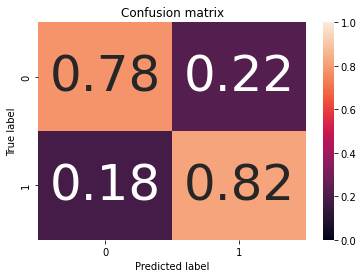

In [107]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)